<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> EDA for Classification Project</h1>
</div>

© Copyright Machine Learning Plus

EDA Objective:
1. Understand and describe the data
2. Relationships in Data
3. Draw insightful inferences


Content:
- Setup Environment
- Data Overview
- Univariate Analysis
- Bivariate Analysis 
    - Significance Tests
- EDA 
    - Get business insights
- Data Preprocessing
    - Missing Values Treatment
    - Outlier Treatment

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Setup Environment</h2>
</div>

- Install the required packages 
- Import all the packages in 1st cell itself
- Set the options for data visualizations

In [11]:
# !pip install pandas_summary==0.0.7

In [181]:
# Data Manipulation
import numpy as np 
import pandas as pd 
from pandas_summary import DataFrameSummary


# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from   scipy.stats import chi2_contingency, f_oneway
from math import log, e

import warnings
import random


# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Data Overview</h2>
</div>

The goal of this section is to :
- Load the data
- Shape of the data
- Explore the features

Load the data using `pd.read_csv()`. 

In [182]:
churn_df = pd.read_csv('../Datasets/churn_modelling_miss.csv')

In [183]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


#### Shape of dataframe

In [184]:
# Shape of dataframe
churn_df.shape

(10000, 14)

### Data Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Columns Description:
1. **RowNumber** - Row Numbers from 1 to 10000
2. **CustomerId** - Unique Ids for bank customer identification
3. **Surname** - Customer's last name
4. **CreditScore** - Credit score of the customer
5. **Geography** - The country from which the customer belongs
6. **Gender** - Male or Female
7. **Age** - Age of the customer
8. **Tenure** - Number of years for which the customer has been with the bank
9. **Balance** - Bank balance of the customer
10. **NumOfProducts** - Number of bank products the customer is utilising
11. **HasCrCard** - Binary Flag for whether the customer holds a credit card with the bank or not
12. **IsActiveMember** - Binary Flag for whether the customer is an active member with the bank or not
13. **EstimatedSalary** - Estimated salary of the customer in Dollars
14. **Exited** - Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [185]:
churn_df.drop('RowNumber', axis = 1, inplace = True)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Univariate Analysis</h2>
</div>

The goal of this section is to:
- Get the summary of data - mean, std, count, quartiles and range
- Get additonal univariate stats of data
    - Missing Values
    - Unique Values
    - Data Type
- Check if the target variable is imbalanced or not
- Entropy of the target variable

#### Summary of dataframe

In [186]:
# Summary Statstic
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,9825.000000,9814.000000,9805.000000,9778.00000,9843.000000,9840.000000,9820.000000,9844.000000,10000.000000
mean,1.569094e+07,650.801018,38.923986,5.011117,76414.97833,1.530123,0.706402,0.514868,100061.891971,0.203700
std,7.193619e+04,96.558052,10.500146,2.893277,62383.54274,0.581135,0.455433,0.499804,57518.439420,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.00000,1.000000,0.000000,0.000000,50908.022500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97070.05500,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,8.000000,127603.68750,2.000000,1.000000,1.000000,149369.790000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.09000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [187]:
# Get summary of categorical columns as well using DataFrameSummary function
dfs = DataFrameSummary(churn_df)
dfs.columns_stats

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
counts,10000,9832,9825,9806,9793,9814,9805,9778,9843,9840,9820,9844,10000
uniques,10000,2907,459,3,2,70,11,6237,4,2,2,9843,2
missing,0,168,175,194,207,186,195,222,157,160,180,156,0
missing_perc,0%,1.68%,1.75%,1.94%,2.07%,1.86%,1.95%,2.22%,1.57%,1.60%,1.80%,1.56%,0%
types,numeric,categorical,numeric,categorical,bool,numeric,numeric,numeric,numeric,bool,bool,numeric,bool


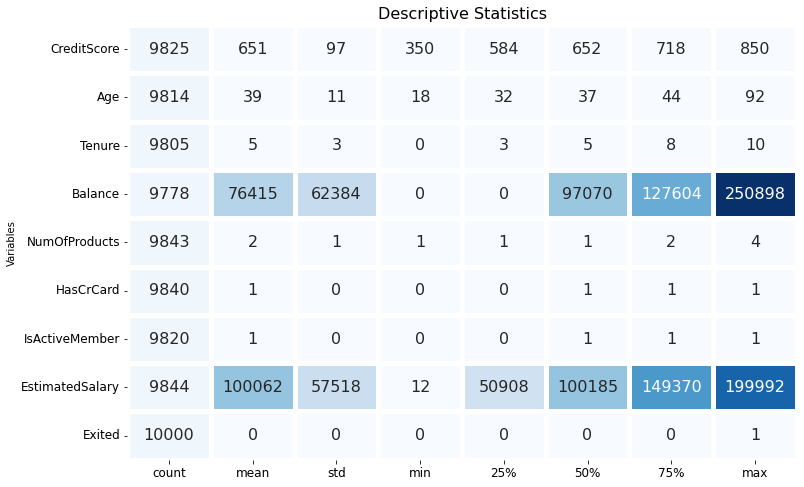

In [188]:
# Let's look at the summary statistic visually
plt.figure(figsize = (12,8))
sns.heatmap(churn_df.drop('CustomerId', axis = 1).describe().T, annot=True,cmap = "Blues", fmt= '.0f',
            linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

#### More Stats on the dataframe

In [189]:
# Stats of dataframe
stats    = []
for col in churn_df.columns:
    stats.append((col, churn_df[col].dtype, churn_df[col].nunique(), churn_df[col].isnull().sum() * 100 / churn_df.shape[0]))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'type', 'Unique_values', 'Percentage of missing values'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values
7,Balance,float64,6237,2.22
4,Gender,object,2,2.07
6,Tenure,float64,11,1.95
3,Geography,object,3,1.94
5,Age,float64,70,1.86
10,IsActiveMember,float64,2,1.80
2,CreditScore,float64,459,1.75
1,Surname,object,2907,1.68
9,HasCrCard,float64,2,1.60
8,NumOfProducts,float64,4,1.57


#### Check if the target class is imbanced

In [190]:
# Get count of target class
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

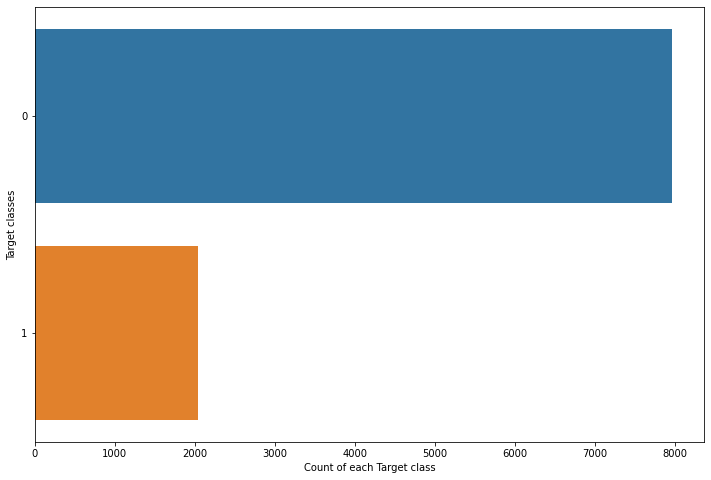

In [191]:
# Draw a countplot to check the distribution of target variable
plt.figure(figsize = (12,8))
sns.countplot(y=churn_df['Exited'] ,data=churn_df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

#### Compute entropy of the target class

In [192]:
def entropy(labels, base=None):
    vc = pd.Series(labels).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

print('Entropy :', entropy(churn_df['Exited'], base=None))

Entropy : 0.505489127326179


In [193]:
# Alternate: using python func
from scipy.stats import entropy
tbl = pd.value_counts(churn_df['Exited'], normalize=True)
entropy(tbl)

0.505489127326179

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:
- The data contains missing value
- Datatype of few categorical columns like Exited, HasCrCard, IsActiveMember is int, rather it should be object
- All the columns have atleast 2 unique values, hence all the columns have variance
- The target class is imbalanced
- Entropy of the target class in 0.5

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Bivariate Analysis - Statistical Significance Tests</h2>
</div>

The goal of this section is to:
- Check the statistical significance of categorical variables with target class using chi-square test
- Check the statistical significance of numerical variables with target class using ANOVA test

In [194]:
# Numeric Columns
num_cols = churn_df._get_numeric_data().columns.to_list()
num_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [195]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


3 columns are actually categorical, while they are stated as numerical. So you need to treat these manually

In [196]:
# Remove the binary columns from numeric list
for col in ['HasCrCard', 'IsActiveMember', 'Exited']:
    num_cols.remove(col)
num_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

In [197]:
# Categorical columns
cat_col = list(set(churn_df.columns) - set(num_cols))
cat_col.remove('Exited')
cat_col

['Surname', 'Gender', 'Geography', 'IsActiveMember', 'HasCrCard']

### Chi Square Test

Check the statistical significance of all the categorical columns with the categorical column

In [198]:
# significance value
alpha = 0.05

significant_categorical_variables = []
for col in cat_col:
    temp = pd.crosstab(churn_df[col],churn_df['Exited'].astype('category'))
    
    # Chi-square stat , p-value, degrees of freedom, expected frequencies
    stat, p, dof, expected = chi2_contingency(temp)
    print(col.ljust(40), ',  chisquared=%.5f,   p-value=%.5f' % (stat, p))
    
    # Determine whether to reject or keep your null hypothesis
    if p <= alpha:
        significant_categorical_variables.append(col)

Surname                                  ,  chisquared=2776.83629,   p-value=0.95648
Gender                                   ,  chisquared=110.67755,   p-value=0.00000
Geography                                ,  chisquared=306.39688,   p-value=0.00000
IsActiveMember                           ,  chisquared=240.11448,   p-value=0.00000
HasCrCard                                ,  chisquared=0.40229,   p-value=0.52591


In [199]:
# See Significant variables
print(significant_categorical_variables)

['Gender', 'Geography', 'IsActiveMember']


Surprisingly 'HasCrCard' columns doesn't have significant effect on the target variable

### ANOVA Test

Check the statistical significance of all the numeric columns with the categorical column

In [200]:
# significance value
alpha = 0.05

significant_numerical_variables = []
for col in num_cols:
    # Get F and p value
    F, p = f_oneway(churn_df[churn_df.Exited == 1][col].dropna(),
                    churn_df[churn_df.Exited == 0][col].dropna())
    
    # Determine whether to reject or keep null hypothesis
    print(col.ljust(50), ',   F-statistic=%.5f, p=%.5f' % (F, p))
    if p <= alpha:
        significant_numerical_variables.append(col)

CustomerId                                         ,   F-statistic=0.39031, p=0.53215
CreditScore                                        ,   F-statistic=6.91222, p=0.00857
Age                                                ,   F-statistic=870.50937, p=0.00000
Tenure                                             ,   F-statistic=2.00427, p=0.15689
Balance                                            ,   F-statistic=142.05691, p=0.00000
NumOfProducts                                      ,   F-statistic=25.40577, p=0.00000
EstimatedSalary                                    ,   F-statistic=1.55199, p=0.21287


In [201]:
# See Significant variables
print(significant_numerical_variables)

['CreditScore', 'Age', 'Balance', 'NumOfProducts']


'CreditScore', 'Age', 'Balance' and 'NumOfProducts' columns are significantly affecting the target variable

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Data Analysis Plots</h2>
</div>

Exploratory data analysis is an approach to analyze data sets to find out patterns, insights and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarize the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.



The goal of this section is to:
- Check the Distribution of Categorical variables
- Check the Distribution of Numerical variables

In [202]:
cat_col.remove('Surname')

In [203]:
# Numeric Columns
num_cols.remove('CustomerId')

In [204]:
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

## Analyze the effect of categorical columns on the target variable

### Gender

Let's start with Gender. At first let's get the count of customers for every gender

Male      5335
Female    4458
Name: Gender, dtype: int64


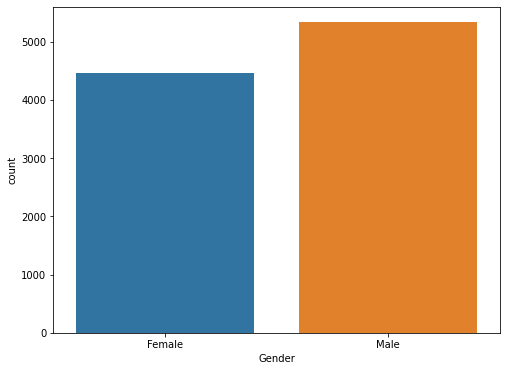

In [205]:
col = 'Gender'
print(churn_df[col].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data=churn_df, x= col)
plt.show()

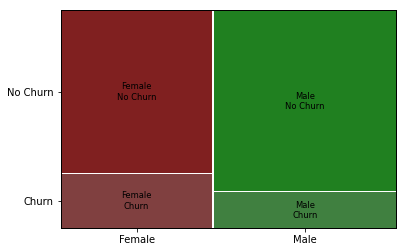

In [206]:
from statsmodels.graphics.mosaicplot import mosaic
churn_df['Exited2'] = churn_df.Exited.map({0:'No Churn', 1:'Churn'})
mosaic(churn_df, ['Gender', 'Exited2']);

In [207]:
# Cross tab
tmp = pd.crosstab(churn_df[col], churn_df['Exited'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'No Churn', 1:'Churn'}, inplace=True)
tmp

Exited,Gender,No Churn,Churn
0,Female,74.966353,25.033647
1,Male,83.580131,16.419869


__Inference:__ Females are lesser in number relatively, but seem to churn faster.

Let's understand the relationship of gender on the target variable - Exited

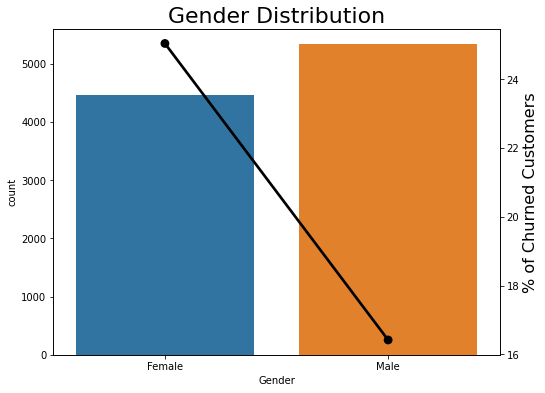

In [208]:
# Draw Plot
plt.figure(figsize = (8,6))
g1 = sns.countplot(data=churn_df, x= col)
gt = g1.twinx()
gt = sns.pointplot(x=col, y='Churn', data=tmp, color='black', order=tmp[col].values, legend=False)
gt.set_ylabel("% of Churned Customers", fontsize=16)
plt.title(' Gender Distribution ', fontsize = 22)
plt.grid(b = False)
plt.show()

__Put all of it in one function__

In [209]:
col

'Gender'

In [211]:
def cat_distribution(churn_df, col):
    print(churn_df[col].value_counts())
    tmp = pd.crosstab(churn_df[col], churn_df['Exited'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'No Churn', 1:'Churn'}, inplace=True)
    plt.figure(figsize = (14,7))
    g1 = sns.countplot(data=churn_df, x= col, order=tmp[col].values)
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Churn', data=tmp, color='black', order=tmp[col].values, legend=False)
    gt.set_ylabel("% of Churned Customers", fontsize=16)
    plt.title(col +  ' Distribution ', fontsize = 22)
    plt.show()

Male      5335
Female    4458
Name: Gender, dtype: int64


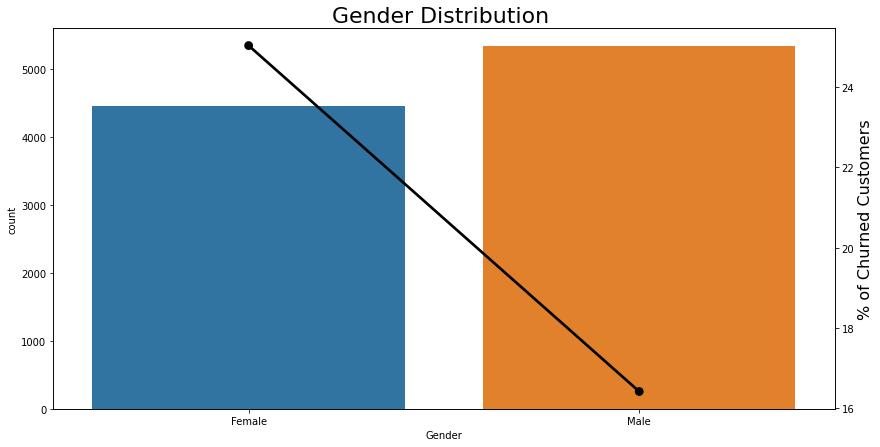

In [213]:
cat_distribution(churn_df, 'Gender')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Male customers are more in number
- Female customers tend to churn out more

## Composite Categorical Variables

Create various combinations of categorical variables that had an impact based on Chi Square Test.

In [214]:
# Create 1. Gender - Geo  2. Gender - Active    3. Geo - Active
churn_df["Gender_Geo"] = churn_df["Gender"].astype(str) + "_" + churn_df["Geography"].astype(str)
churn_df["Gender_Active"] = churn_df["Gender"].astype(str) + "_" + churn_df["IsActiveMember"].astype(str)
churn_df["Geography_Active"] = churn_df["Geography"].astype(str) + "_" + churn_df["IsActiveMember"].astype(str)
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited2,Gender_Geo,Gender_Active,Geography_Active
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,Churn,Female_France,Female_1.0,France_1.0
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,No Churn,Female_Spain,Female_1.0,Spain_1.0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,Churn,Female_France,Female_0.0,France_0.0
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,No Churn,Female_France,Female_0.0,France_0.0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,No Churn,Female_Spain,Female_1.0,Spain_1.0


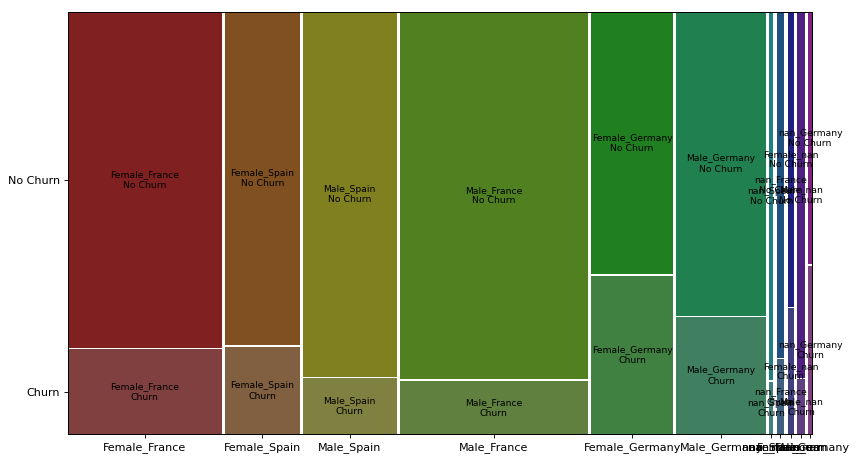

In [215]:
# [Gender - Geography] vs Churned
fig = plt.figure(figsize=(12,7), dpi= 80)
ax = fig.gca()
mosaic(churn_df, ['Gender_Geo', 'Exited2'], ax=ax);

__Inference:__ 
1. Females have a larger churn rate across all countries.
2. Churn is significantly larger in Germany compared to France and spain.  (__Tip:__ Ideal to calculate the exact % by which is churn is higher in germany than the other two countries, especially when you present to stakeholders.)

Male_France       2649
Female_France     2172
Male_Spain        1319
Male_Germany      1260
Female_Germany    1152
Female_Spain      1047
Male_nan           107
nan_France         101
Female_nan          87
nan_Spain           56
nan_Germany         50
Name: Gender_Geo, dtype: int64


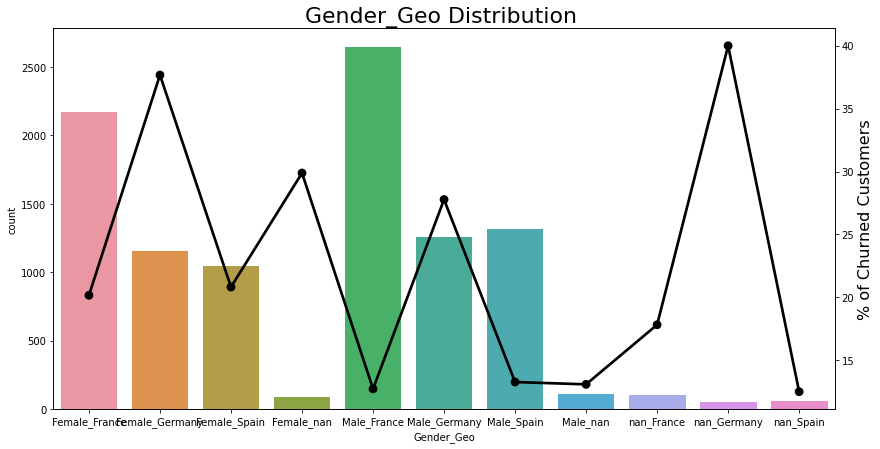

In [216]:
cat_distribution(churn_df, 'Gender_Geo')

__Geography - Active__

France_1.0     2501
France_0.0     2336
Spain_1.0      1262
Germany_0.0    1210
Germany_1.0    1205
Spain_0.0      1112
nan_0.0         106
nan_1.0          88
France_nan       85
Spain_nan        48
Germany_nan      47
Name: Geography_Active, dtype: int64


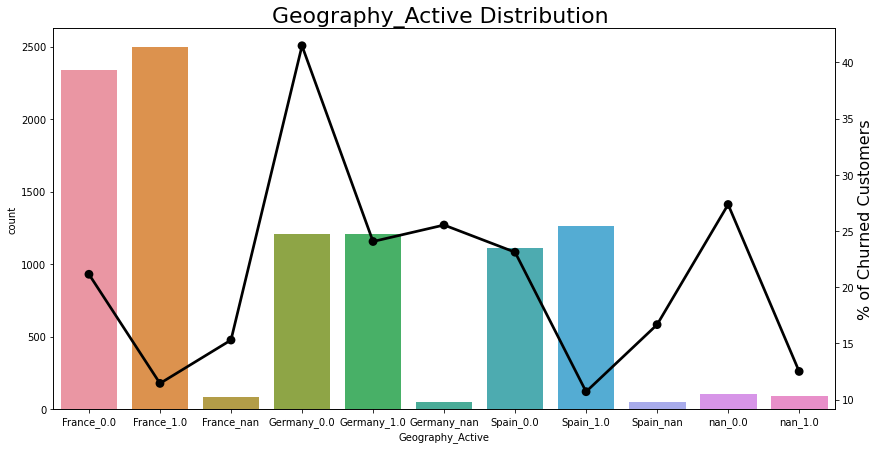

In [217]:
cat_distribution(churn_df, 'Geography_Active')

__Inference__: 

Non active members seem to have a larger churn rate than active members across all countries. So, IsActive might be helpful feature.

France     4922
Germany    2462
Spain      2422
Name: Geography, dtype: int64


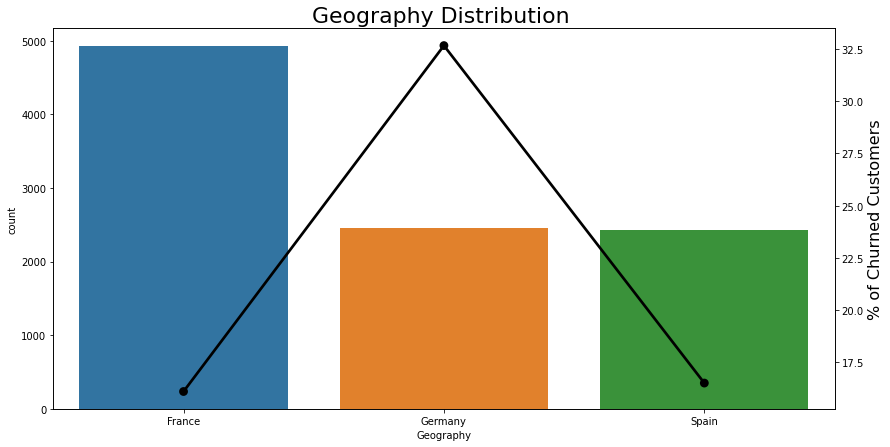

In [218]:
cat_distribution(churn_df, 'Geography')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- More than 50% of the customers are from France
- Customers from Germany tend to churn out more

### HasCrCard

1.0    6951
0.0    2889
Name: HasCrCard, dtype: int64


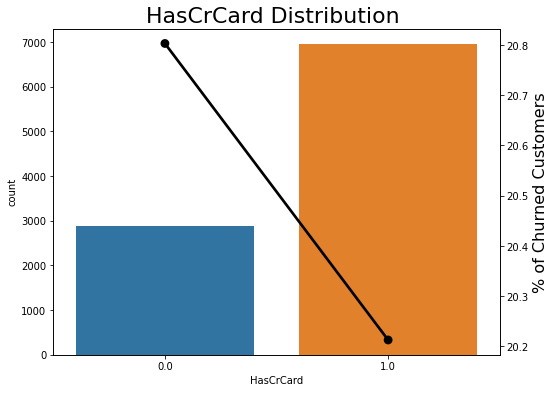

In [41]:
cat_distribution(churn_df, 'HasCrCard')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- More than 70% of the customers have credit card
- Churn rate is comparable in both types of cutomers, similar behaviour was observed in the statistical test as well

### IsActiveMember

1.0    5056
0.0    4764
Name: IsActiveMember, dtype: int64


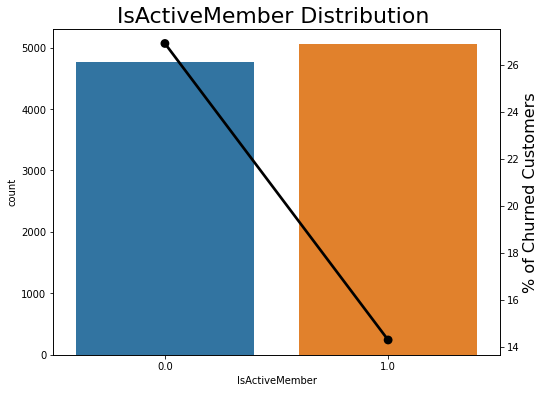

In [42]:
cat_distribution(churn_df, 'IsActiveMember')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Around 51% customers are active and 49% inactive
- Inactive customers tend to churn out more

### Tenure

The tenure column can be treated as both categorical column as well as numerical column. Let's analyze the distribution

2.0     1024
1.0     1020
8.0     1009
7.0     1004
3.0      992
5.0      986
4.0      976
9.0      964
6.0      945
10.0     481
0.0      404
Name: Tenure, dtype: int64


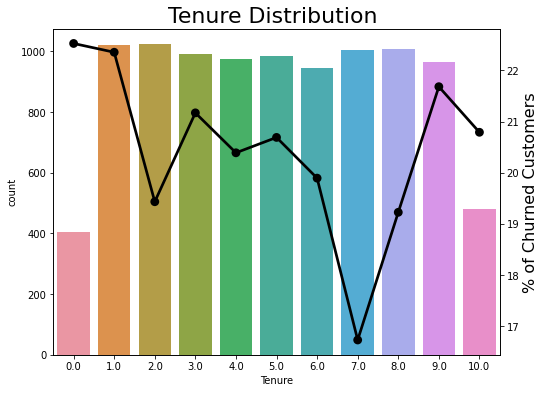

In [43]:
cat_distribution(churn_df, 'Tenure')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the customers have tenure between 1 to 9 years
- Customers with tenure 0, 1 and 9 years tend to churn out more
- Customers with tenure 7 years seem to have low churn rate for some reason. --> discuss with stakeholders to find out more.

### NumOfProducts

1.0    5002
2.0    4523
3.0     259
4.0      59
Name: NumOfProducts, dtype: int64


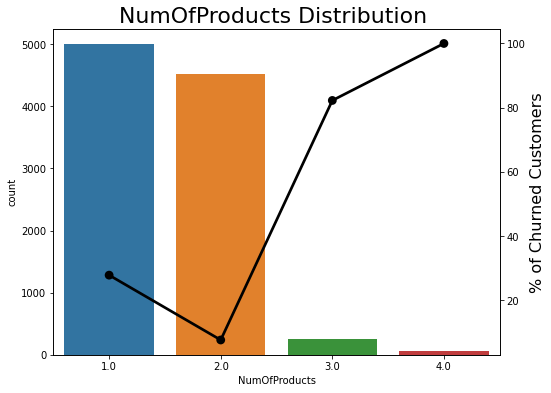

In [44]:
cat_distribution(churn_df, 'NumOfProducts')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Majority of the customers have 1 or 2 products
- Churn Rate is lowest in the customers with 2 products
- Churn Rate is highest in the customers with more than 2 products.
Chances are customers subscribing more products have a higher risk of leaving (might be experiencing some _negative_ side of the business).

## Analyze the effect of numerical columns on the target variable

### CreditScore

Let's start with CreditScore. At first let's check the distribution of CreditScore

In [45]:
col = 'CreditScore'

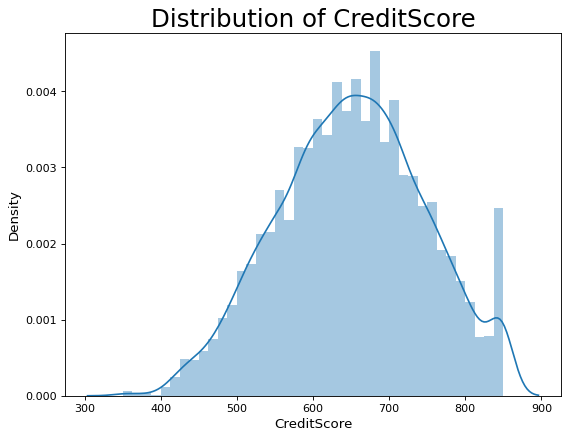

In [46]:
# Plot distplot
plt.figure(figsize = (8,6), dpi= 80)
sns.distplot(churn_df[col], label=col, hist = True)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.xlabel(col, fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

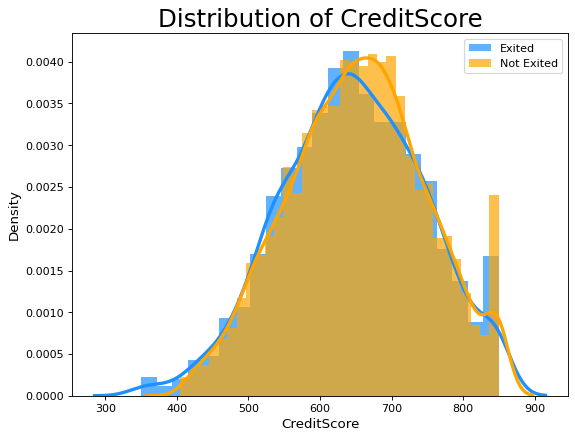

In [171]:
    plt.figure(figsize = (8,6), dpi= 80)
    sns.distplot(churn_df.loc[churn_df['Exited']==1, col], hist = True, color="dodgerblue", label="Exited", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(churn_df.loc[churn_df['Exited']==0, col], hist = True, color="orange", label="Not Exited", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.title("Distribution of " + col, fontsize=22)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()

Let's draw the boxplot

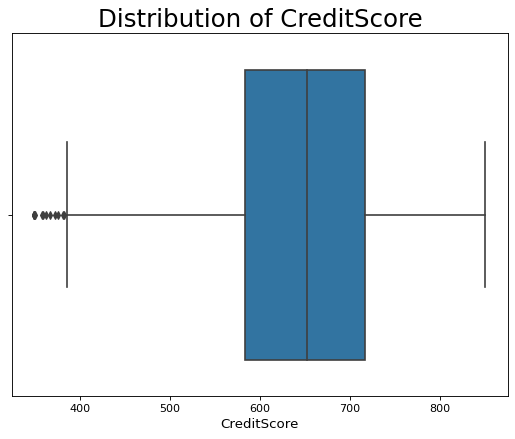

In [75]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x=col, data=churn_df, notch=False)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.xlabel(col, fontsize = 12)
plt.show()

Let's draw multiple boxplots for every category of target class

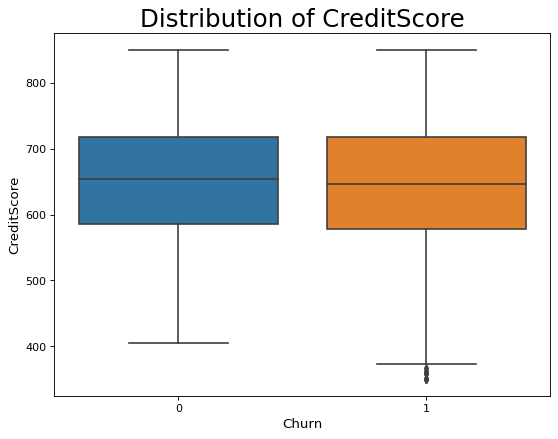

In [48]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x='Exited', y=col, data=churn_df, notch=False)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.xlabel('Churn', fontsize = 12)
plt.ylabel(col, fontsize = 12)

plt.show()

Let's create a function to get all these plots and information. So that it can be reused.

In [97]:
def num_distribution(churn_df, col):
    
    # Plot distplot
    plt.figure(figsize = (8,6), dpi= 80)
    sns.distplot(churn_df[col], label=col, hist = True)
    plt.title("Distribution of " + col, fontsize=22)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()
    
    plt.figure(figsize = (8,6), dpi= 80)
    sns.distplot(churn_df.loc[churn_df['Exited']==1, col], hist = True, color="dodgerblue", label="Exited", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    sns.distplot(churn_df.loc[churn_df['Exited']==0, col], hist = True, color="orange", label="Not Exited", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
    plt.title("Distribution of " + col, fontsize=22)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()
    
    # Plot Boxplot
    plt.figure(figsize=(8,6), dpi= 80)
    sns.boxplot(x=col, data=churn_df, notch=False)
    plt.title("Distribution of " + col, fontsize=22)
    plt.xlabel('Churn', fontsize = 12)
    plt.ylabel(col, fontsize = 12)
    plt.show()
    
    # Plot Boxplot
    plt.figure(figsize=(8,6), dpi= 80)
    sns.boxplot(x='Exited', y=col, data=churn_df, notch=False)
    plt.title("Distribution of " + col, fontsize=22)
    plt.xlabel('Churn', fontsize = 12)
    plt.ylabel(col, fontsize = 12)
    plt.show()

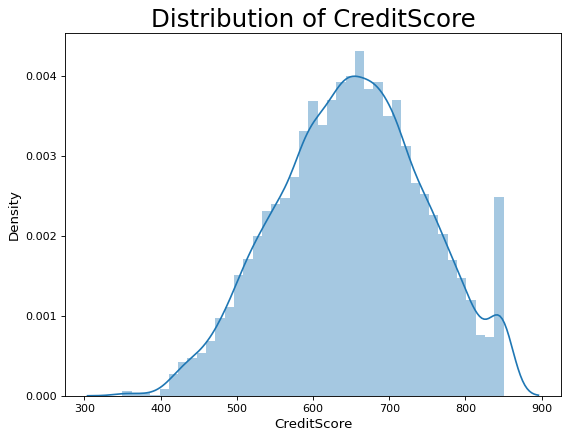

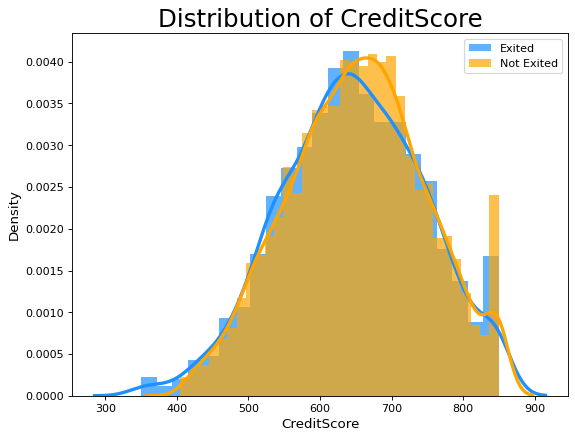

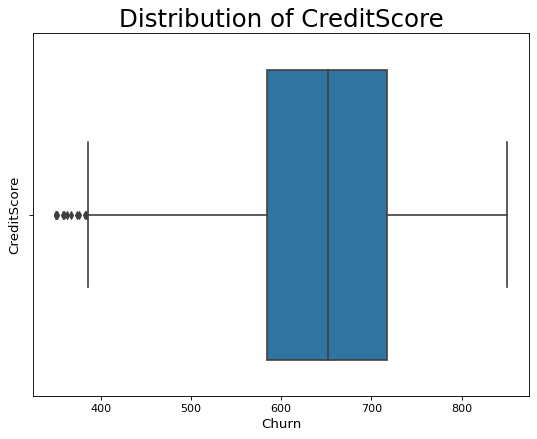

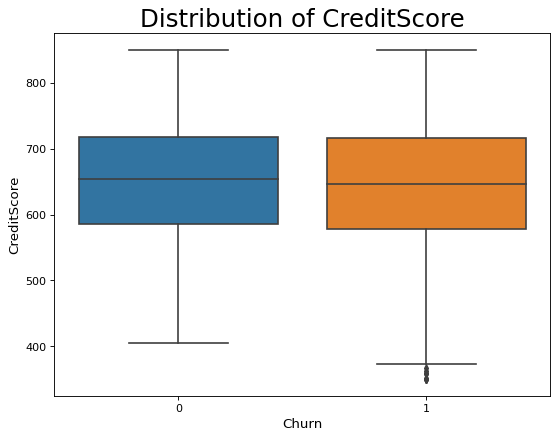

In [98]:
num_distribution(churn_df, col)

There are certain outlier points at the bottom. Let's check the customers who have credit score less than 400. 

In [99]:
churn_df[churn_df['CreditScore'] < 400]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited2,Gender_Geo,Gender_Active,Geography_Active
7,15656148,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1,Churn,Female_Germany,Female_0.0,Germany_0.0
1193,15779947,Thomas,363.0,Spain,Female,28.0,6.0,146098.43,3.0,1.0,0.0,100615.14,1,Churn,Female_Spain,Female_0.0,Spain_0.0
1201,15651052,Smith,399.0,Germany,Male,46.0,2.0,127655.22,1.0,1.0,0.0,139994.68,1,Churn,Male_Germany,Male_0.0,Germany_0.0
1405,15612494,Panicucci,359.0,France,Male,44.0,6.0,128747.69,1.0,1.0,0.0,146955.71,1,Churn,nan_France,nan_0.0,France_0.0
1631,15685372,Azubuike,350.0,Spain,Male,54.0,1.0,152677.48,1.0,1.0,1.0,191973.49,1,Churn,Male_Spain,Male_1.0,Spain_1.0
1838,15758813,Campbell,350.0,Germany,Male,39.0,0.0,109733.20,2.0,0.0,0.0,123602.11,1,Churn,Male_Germany,Male_0.0,Germany_0.0
1962,15692416,Aikenhead,358.0,Spain,Female,52.0,8.0,143542.36,3.0,1.0,0.0,141959.11,1,Churn,Female_Spain,Female_0.0,Spain_0.0
2473,15679249,Chou,351.0,Germany,Female,57.0,4.0,163146.46,1.0,1.0,0.0,169621.69,1,Churn,Female_Germany,Female_0.0,Germany_0.0
5285,15732643,Pike,386.0,Spain,Female,53.0,1.0,131955.07,1.0,1.0,1.0,62514.65,1,Churn,Female_Spain,Female_1.0,Spain_1.0
5494,15642821,Ijendu,383.0,Spain,Female,33.0,8.0,95808.19,1.0,0.0,0.0,137702.01,1,Churn,Female_Spain,Female_0.0,Spain_0.0


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- CreditScore variable is almost normally distributed
- Customers who have churned out has a slightly lower credit score as compared to customers who haven't churned out
- All the customers who have credit score less than 400, have churned out

### Age

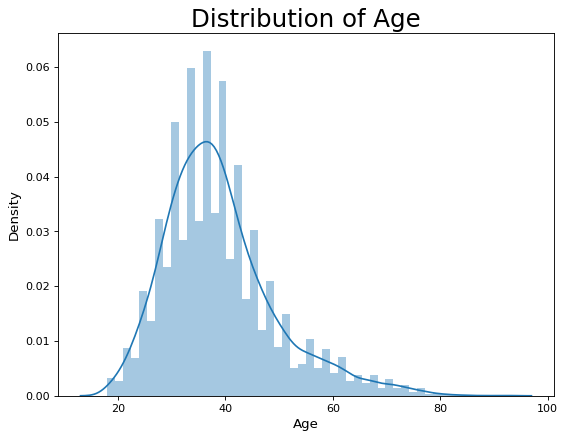

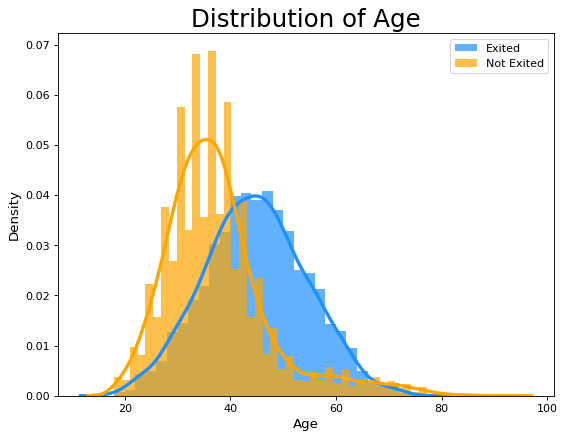

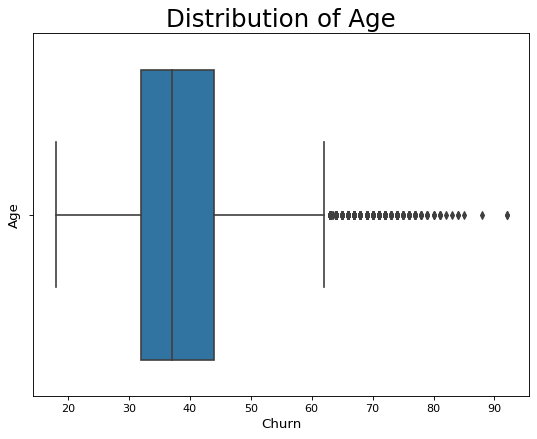

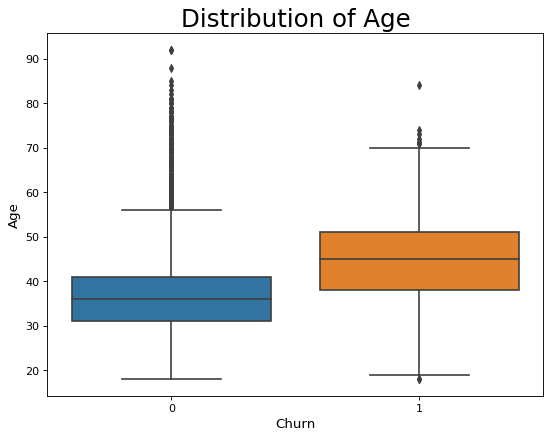

In [100]:
num_distribution(churn_df, 'Age')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Shape of Age variable seems to follow normal distribution, with few outliers
- Aged customers tend to churn out more as compared to young customers

### Balance

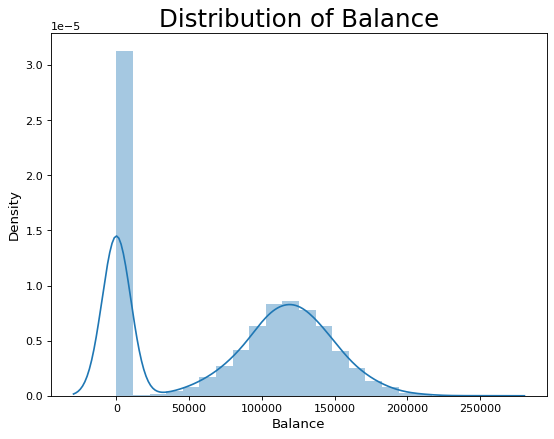

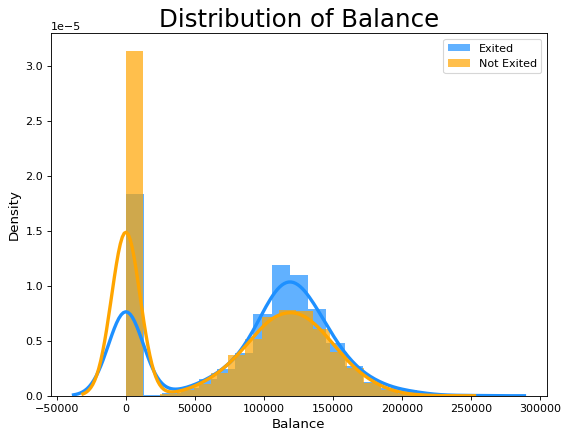

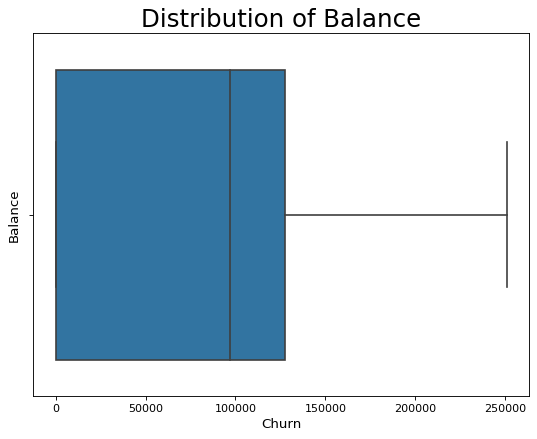

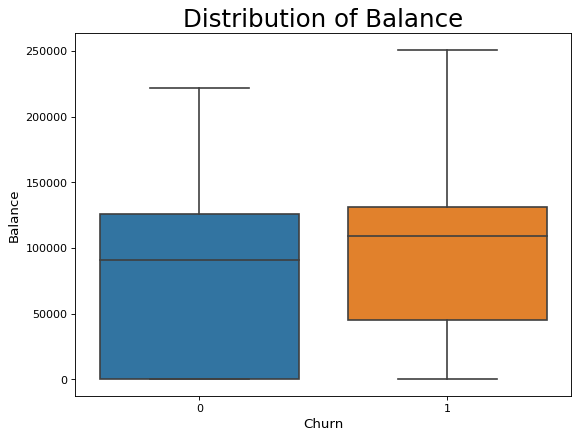

In [101]:
num_distribution(churn_df, 'Balance')

Let's check the customers who have 0 balance

In [102]:
print(churn_df[churn_df['Balance'] == 0]['Exited'].value_counts())
print(churn_df[churn_df['Balance'] == 0]['Exited'].value_counts(normalize=True))

0    3079
1     491
Name: Exited, dtype: int64
0    0.862465
1    0.137535
Name: Exited, dtype: float64


Let's check the customers who have some balance

In [103]:
print(churn_df[churn_df['Balance'] > 0]['Exited'].value_counts())
print(churn_df[churn_df['Balance'] > 0]['Exited'].value_counts(normalize=True))

0    4884
1    1546
Name: Exited, dtype: int64
0    0.759565
1    0.240435
Name: Exited, dtype: float64


__Inference:__ The proportion of attrited customers is more when there is 0 balance.

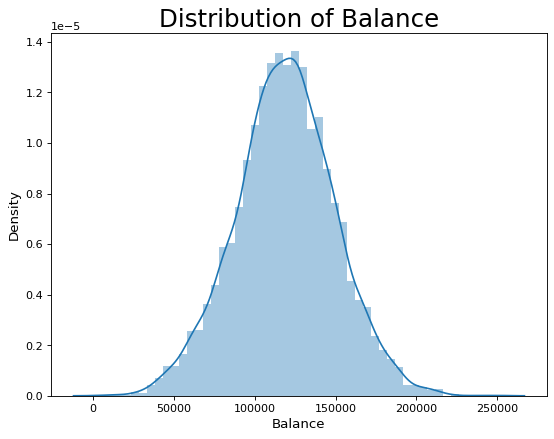

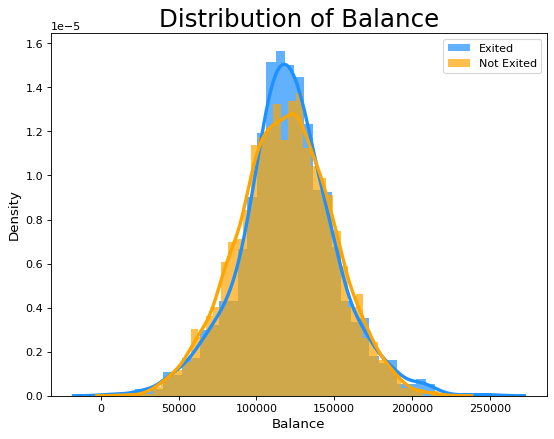

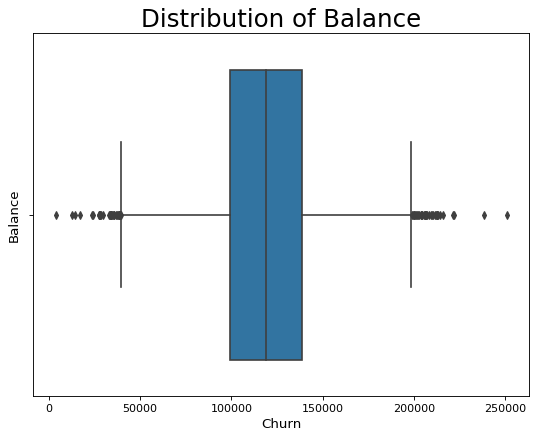

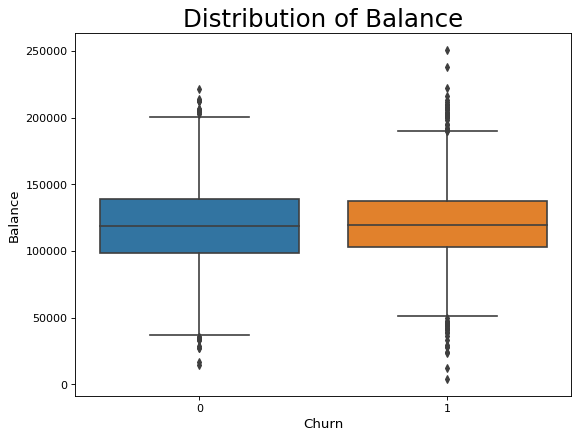

In [104]:
num_distribution(churn_df[churn_df['Balance'] != 0], 'Balance')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- 3617 customers have 0 balance
- If you remove the customers with 0 balance, balance variable is almost linearly distributed
- Around 86% of the customers with 0 balance, haven't churned out
- Surprisingly Customers who have churned out have slightly higher balance as compared to customers who haven't churned out. But if you remove the customers with 0 balance, the median of balance is similar for both types of customers who have churned out and who haven't

### EstimatedSalary

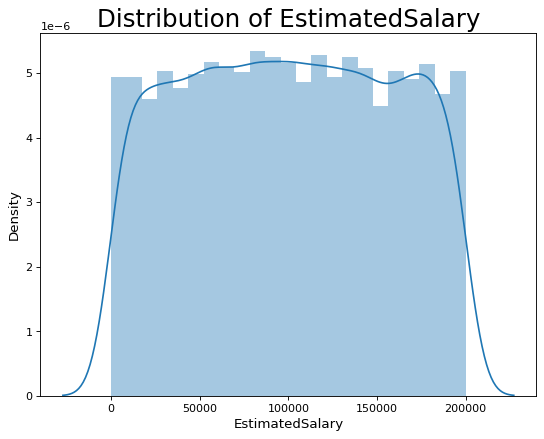

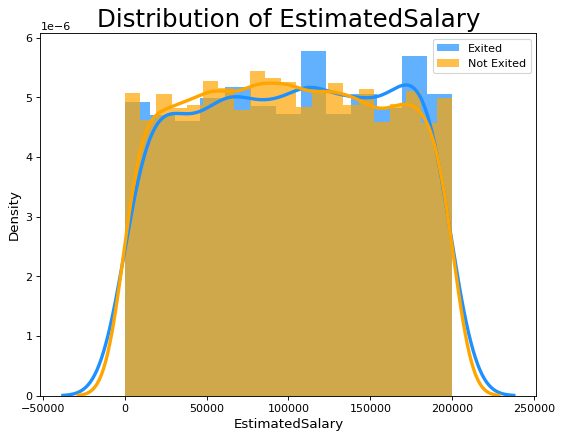

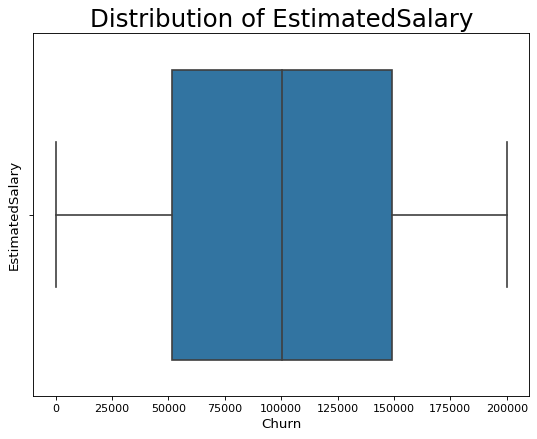

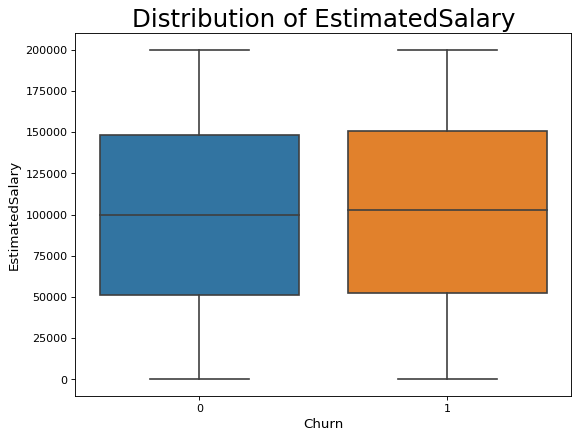

In [105]:
num_distribution(churn_df, 'EstimatedSalary')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- By looking at the above plots, it can't be concluded if salary has an effect on churn rate

### Tenure

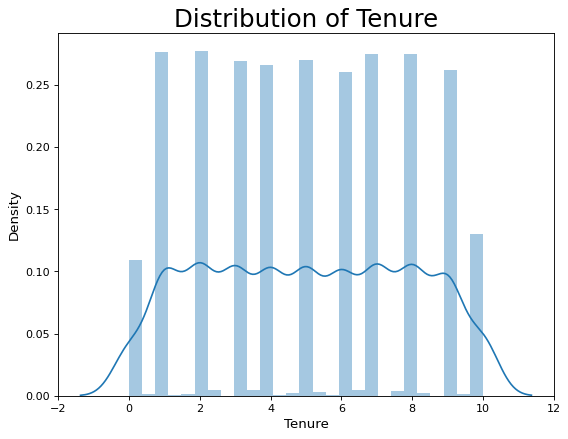

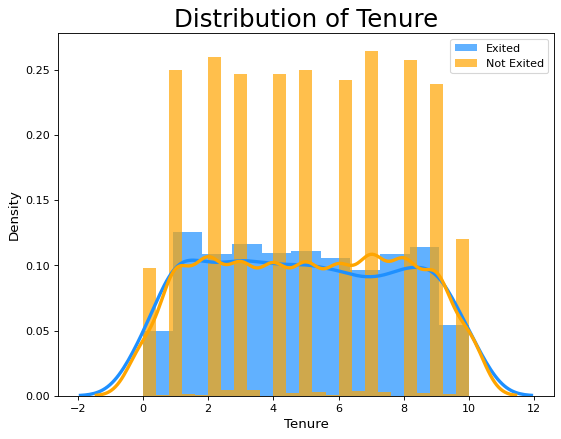

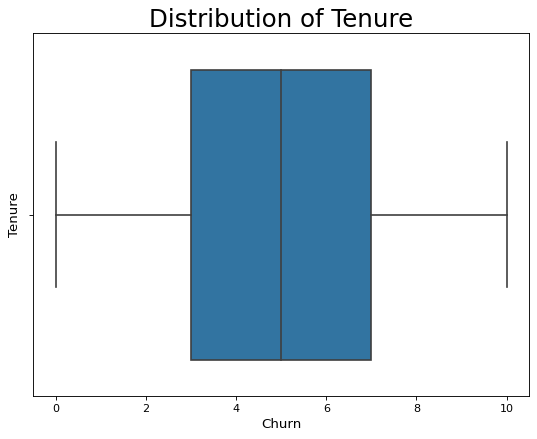

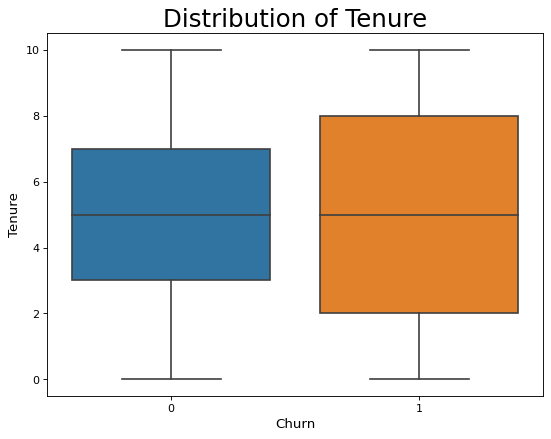

In [106]:
num_distribution(churn_df, 'Tenure')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Cutomers who are still with us have a narrow boxplot compared to customers who have churned out, i.e. the deviation in tenure is less for the customers who are with us. 

### NumOfProducts

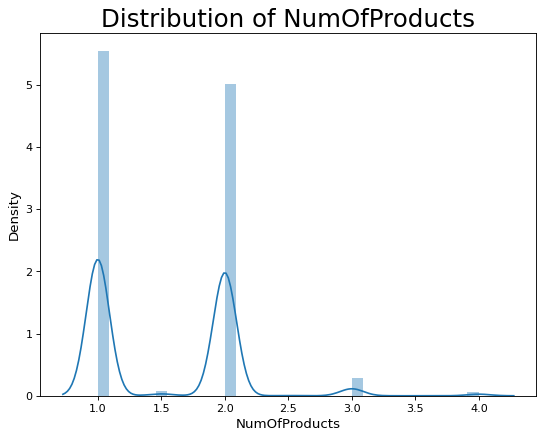

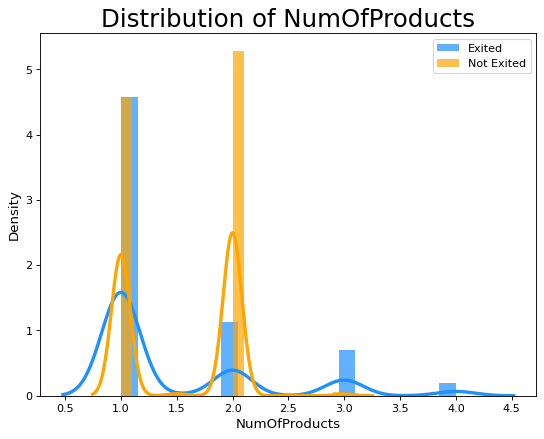

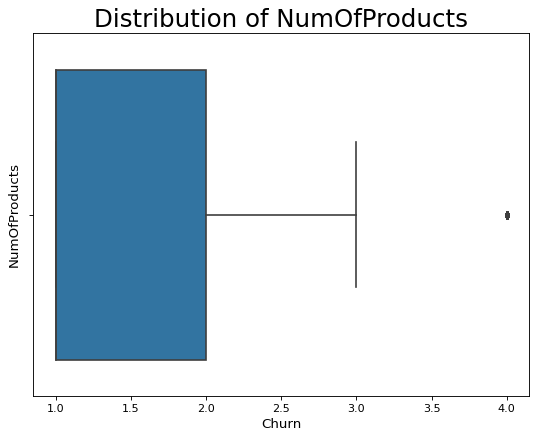

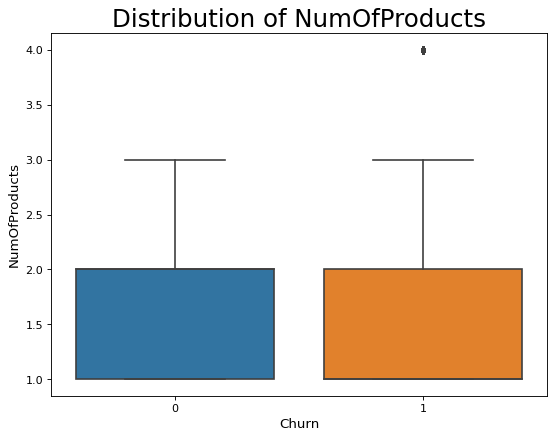

In [107]:
num_distribution(churn_df, 'NumOfProducts')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Customers with 4 products tend to churn out more

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Data Preprocessing</h2>
</div>

The goal of this section is to:
- Treat the missing values
- Check for outliers

### Treat the missing values
- Replace the missing values with linear interpolation

In [219]:
# Get summary of df
dfs = DataFrameSummary(churn_df)
dfs.columns_stats

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited2,Gender_Geo,Gender_Active,Geography_Active
counts,10000,9832,9825,9806,9793,9814,9805,9778,9843,9840,9820,9844,10000,10000,10000,10000,10000
uniques,10000,2907,459,3,2,70,11,6237,4,2,2,9843,2,2,11,8,11
missing,0,168,175,194,207,186,195,222,157,160,180,156,0,0,0,0,0
missing_perc,0%,1.68%,1.75%,1.94%,2.07%,1.86%,1.95%,2.22%,1.57%,1.60%,1.80%,1.56%,0%,0%,0%,0%,0%
types,numeric,categorical,numeric,categorical,bool,numeric,numeric,numeric,numeric,bool,bool,numeric,bool,bool,categorical,categorical,categorical


In [220]:
# Let's interpolate the numerical missing values using Linear interpolation
churn_df = churn_df.interpolate(method ='linear', limit_direction ='forward')

In [221]:
# Get summary of df
dfs = DataFrameSummary(churn_df)
dfs.columns_stats

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited2,Gender_Geo,Gender_Active,Geography_Active
counts,10000,9832,10000,9806,9793,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
uniques,10000,2907,538,3,2,104,32,6428,10,7,3,9999,2,2,11,8,11
missing,0,168,0,194,207,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,1.68%,0%,1.94%,2.07%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,categorical,numeric,categorical,bool,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,bool,categorical,categorical,categorical


In [222]:
# Let's impute the categorical missing values with most frequent observation
churn_df = churn_df.fillna(churn_df.mode().iloc[0])

In [223]:
# Get summary of df
dfs = DataFrameSummary(churn_df)
dfs.columns_stats

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited2,Gender_Geo,Gender_Active,Geography_Active
counts,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
uniques,10000,2907,538,3,2,104,32,6428,10,7,3,9999,2,2,11,8,11
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,categorical,numeric,categorical,bool,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,bool,categorical,categorical,categorical


## Outlier Detection
- Detect outliers using LocalOutlierFactor
- Drop the outliers

In [224]:
#define response variable
y = churn_df['Exited']

x = churn_df.drop(['Exited', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Exited2', 'Gender_Geo', 'Gender_Active', 'Geography_Active'], axis = 1)

In [225]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [226]:
from sklearn.neighbors import LocalOutlierFactor

# train the IsolationForest algo on data
model = LocalOutlierFactor()
yhat = model.fit_predict(x)

In [227]:
# select all rows that are outliers
outliers = yhat == -1

# select all rows that are not outliers
mask = yhat != -1

In [228]:
# Outliers
pd.concat([x.iloc[outliers, :], y.iloc[outliers]], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
138,584.0,48.0,2.0,213146.20,1.0,1.0,0.0,75161.25,1
520,850.0,35.0,1.0,211774.31,1.0,1.0,0.0,188574.12,1
1533,850.0,37.0,3.0,212778.20,1.0,0.0,1.0,69372.88,0
1791,702.0,35.0,8.0,14262.80,2.0,1.0,0.0,54689.16,0
1830,506.0,37.0,5.0,0.00,2.0,1.0,1.0,127543.81,0
1856,527.0,29.0,2.0,27755.97,1.0,1.0,0.0,97468.44,1
2092,655.0,38.0,3.0,250898.09,3.0,0.0,1.0,81054.00,1
2709,592.0,37.0,4.0,212692.97,1.0,0.0,0.0,176395.02,0
3280,583.0,57.0,3.0,238387.56,1.0,0.0,1.0,147964.99,1
3588,489.0,46.0,3.0,221532.80,1.0,1.0,0.0,171867.08,0


In [229]:
# Remove all the outliers from churn df
final_df = churn_df.iloc[mask, :]
final_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited2,Gender_Geo,Gender_Active,Geography_Active
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,Churn,Female_France,Female_1.0,France_1.0
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,No Churn,Female_Spain,Female_1.0,Spain_1.0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,Churn,Female_France,Female_0.0,France_0.0
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,No Churn,Female_France,Female_0.0,France_0.0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,No Churn,Female_Spain,Female_1.0,Spain_1.0


In [230]:
# Get shape of final df
final_df.shape

(9975, 17)